In [191]:
# Import required libraries and dependencies
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import hvplot.pandas

In [192]:
# Load the data into a Pandas DataFrame and make the index the "coin_id" column.
market_data_df = pd.read_csv("Resources/crypto_market_data.csv", index_col="coin_id")

# Display sample data
market_data_df.head(10)

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,1.08388,7.60278,6.57509,7.67258,-3.25185,83.51840,37.51761
ethereum,0.22392,10.38134,4.80849,0.13169,-12.88890,186.77418,101.96023
tether,-0.21173,0.04935,0.00640,-0.04237,0.28037,-0.00542,0.01954
ripple,-0.37819,-0.60926,2.24984,0.23455,-17.55245,39.53888,-16.60193
bitcoin-cash,2.90585,17.09717,14.75334,15.74903,-13.71793,21.66042,14.49384
binancecoin,2.10423,12.85511,6.80688,0.05865,36.33486,155.61937,69.69195
chainlink,-0.23935,20.69459,9.30098,-11.21747,-43.69522,403.22917,325.13186
cardano,0.00322,13.99302,5.55476,10.10553,-22.84776,264.51418,156.09756
litecoin,-0.06341,6.60221,7.28931,1.21662,-17.23960,27.49919,-12.66408


In [193]:
# Generate summary statistics
market_data_df.describe()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
count,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000
mean,-0.269686,4.497147,0.185787,1.545693,-0.094119,236.537432,347.667956
std,2.694793,6.375218,8.376939,26.344218,47.365803,435.225304,1247.842884
min,-13.527860,-6.094560,-18.158900,-34.705480,-44.822480,-0.392100,-17.567530
25%,-0.608970,0.047260,-5.026620,-10.438470,-25.907990,21.660420,0.406170
50%,-0.063410,3.296410,0.109740,-0.042370,-7.544550,83.905200,69.691950
75%,0.612090,7.602780,5.510740,4.578130,0.657260,216.177610,168.372510
max,4.840330,20.694590,24.239190,140.795700,223.064370,2227.927820,7852.089700


## Prepare the Data

In [195]:
# Use the `StandardScaler()` module from scikit-learn to normalize the data from the CSV file
numeric_columns = market_data_df.select_dtypes(include='number').columns
market_data_scaled = StandardScaler().fit_transform(market_data_df[numeric_columns])


In [196]:
# Create a DataFrame with the scaled data
mkt_data_scaled_df = pd.DataFrame(market_data_scaled, columns=numeric_columns, index=market_data_df.index)

# Copy the crypto names from the original data
#mkt_data_scaled_df["coin_id"] = market_data_df.index

# Set the coinid column as index
#mkt_data_scaled_df = mkt_data_scaled_df.set_index("coin_id")

# Display sample data
mkt_data_scaled_df.head(10)

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637
ethereum,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352
tether,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061
ripple,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546
bitcoin-cash,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317
binancecoin,0.891871,1.327295,0.800214,-0.057148,0.778653,-0.188232,-0.225533
chainlink,0.011397,2.572251,1.101647,-0.490495,-0.931954,0.387759,-0.018284
cardano,0.102530,1.508001,0.648885,0.328959,-0.486349,0.065080,-0.155428
litecoin,0.077497,0.334297,0.858520,-0.012646,-0.366477,-0.486266,-0.292351


### Find the Best Value for k Using the Original Scaled DataFrame.

In [163]:
# Create a list with the number of k-values to try
# Use a range from 1 to 11
k = list(range(1, 11))

# Create an empty list to store the inertia values
inertia = []

# Create a for loop to compute the inertia with each possible value of k
# Inside the loop:
# 1. Create a KMeans model using the loop counter for the n_clusters
# 2. Fit the model to the data using the scaled DataFrame
# 3. Append the model.inertia_ to the inertia list
for i in k: 
    k_model = KMeans(n_clusters=i, random_state=1)
    k_model.fit(mkt_data_scaled_df)
    inertia.append(k_model.inertia_)

# Create a dictionary with the data to plot the Elbow curve
elbow_data = {"k": k, "inertia": inertia}

# Create a DataFrame with the data to plot the Elbow curve
elbow_df = pd.DataFrame(elbow_data)

# Display the DataFrame
elbow_df.head(10)

C:\Users\sebas\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1037: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  "KMeans is known to have a memory leak on Windows "


,k,inertia
0,1,287.000000
1,2,195.820218
2,3,123.190482
3,4,79.022435
4,5,65.405923
5,6,52.933559
6,7,47.983124
7,8,37.288187
8,9,33.061685
9,10,28.779752


In [164]:
# Plot a line chart with all the inertia values computed with 
# the different values of k to visually identify the optimal value for k.
elbow_df.hvplot.line(x="k", y="inertia", title="Elbow Curve", xticks=k)
elbow_df.head(10)

,k,inertia
0,1,287.000000
1,2,195.820218
2,3,123.190482
3,4,79.022435
4,5,65.405923
5,6,52.933559
6,7,47.983124
7,8,37.288187
8,9,33.061685
9,10,28.779752


#### Answer the following question: 
**Question:** What is the best value for `k`?

**Answer:**4

### Cluster Cryptocurrencies with K-means Using the Original Scaled Data.

In [197]:
# Initialize the K-Means model using the best value for k
best_k = 4
k_model = KMeans(n_clusters=best_k, random_state=1)

In [198]:
# Fit the K-Means model using the scaled data
k_model.fit(mkt_data_scaled_df)


KMeans(n_clusters=4, random_state=1)

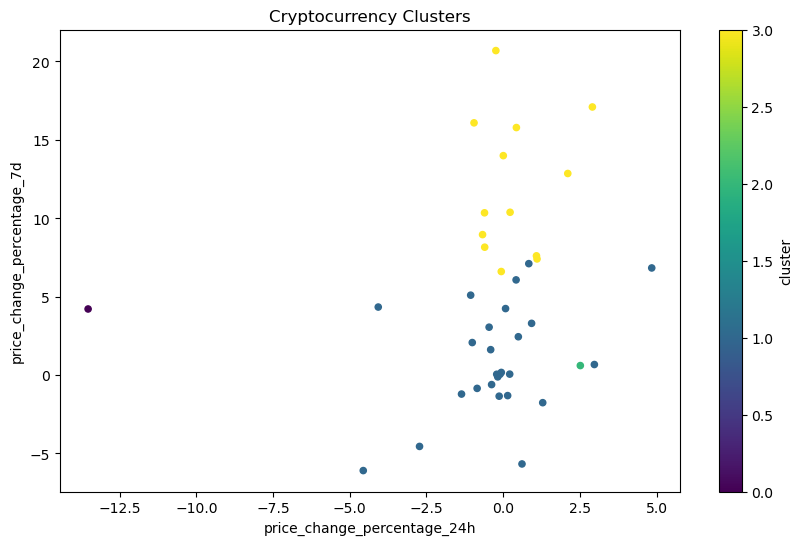

In [199]:
# Predict the clusters to group the cryptocurrencies using the scaled data
original_clusters = k_model.predict(mkt_data_scaled_df)
# Create a copy of the DataFrame
market_data_df["cluster"] = original_clusters

# View the resulting array of cluster values.
# Create a scatter plot using pandas' plot
market_data_df.plot.scatter(
    x="price_change_percentage_24h",
    y="price_change_percentage_7d",
    c="cluster",
    colormap='viridis',
    figsize=(10, 6),
    title="Cryptocurrency Clusters"
)
plt.show()

In [200]:
# Create a copy of the DataFrame
market_data_df["cluster"] = original_clusters


In [201]:
# Add a new column to the DataFrame with the predicted clusters
market_data_df["cluster"] = k_model.labels_


# Display sample data
market_data_df.head(10)


,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y,cluster
coin_id,,,,,,,,
bitcoin,1.08388,7.60278,6.57509,7.67258,-3.25185,83.51840,37.51761,3
ethereum,0.22392,10.38134,4.80849,0.13169,-12.88890,186.77418,101.96023,3
tether,-0.21173,0.04935,0.00640,-0.04237,0.28037,-0.00542,0.01954,1
ripple,-0.37819,-0.60926,2.24984,0.23455,-17.55245,39.53888,-16.60193,1
bitcoin-cash,2.90585,17.09717,14.75334,15.74903,-13.71793,21.66042,14.49384,3
binancecoin,2.10423,12.85511,6.80688,0.05865,36.33486,155.61937,69.69195,3
chainlink,-0.23935,20.69459,9.30098,-11.21747,-43.69522,403.22917,325.13186,3
cardano,0.00322,13.99302,5.55476,10.10553,-22.84776,264.51418,156.09756,3
litecoin,-0.06341,6.60221,7.28931,1.21662,-17.23960,27.49919,-12.66408,3


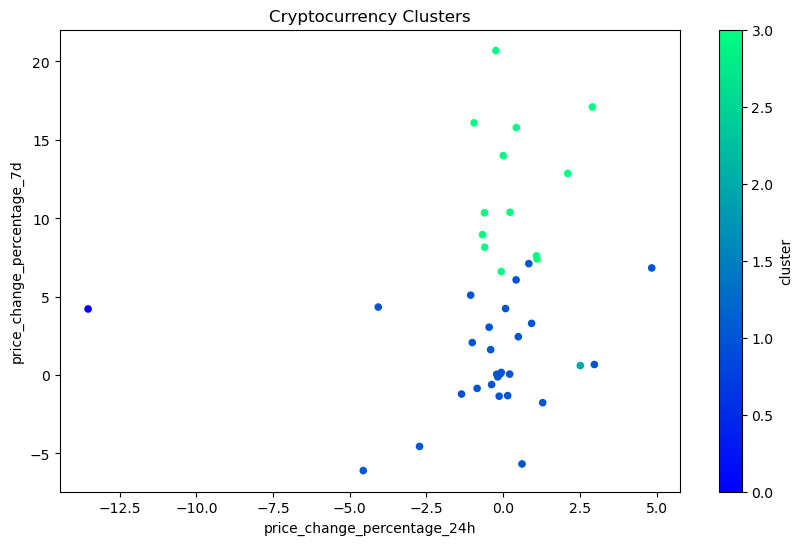

In [170]:
# Create a scatter plot using Pandas plot by setting 
# `x="price_change_percentage_24h"` and `y="price_change_percentage_7d"`.
# Use "rainbow" for the color to better visualize the data.
market_data_df.plot.scatter(
    x="price_change_percentage_24h",
    y="price_change_percentage_7d",
    c="cluster",
    colormap='winter',
    figsize=(10, 6),
    title="Cryptocurrency Clusters"
)
plt.show()

### Optimize Clusters with Principal Component Analysis.

In [202]:
# Create a PCA model instance and set `n_components=3`.
pca = PCA(n_components=3)


In [222]:
# Use the PCA model with `fit_transform` on the original scaled DataFrame to reduce to three principal components.

crypto_pca = pca.fit_transform(mkt_data_scaled_df)
# Create a DataFrame with the PCA data
pca_columns = ["PC1", "PC2", "PC3"]
crypto_pca_df = pd.DataFrame(crypto_pca, columns=pca_columns, index=mkt_data_scaled_df.index)

# View the first five rows of the DataFrame. 
crypto_pca_df.head(10)

,PC1,PC2,PC3
coin_id,,,
bitcoin,-0.600667,0.842760,0.461595
ethereum,-0.458261,0.458466,0.952877
tether,-0.433070,-0.168126,-0.641752
ripple,-0.471835,-0.222660,-0.479053
bitcoin-cash,-1.157800,2.041209,1.859715
binancecoin,-0.516534,1.388377,0.804071
chainlink,-0.450711,0.517699,2.846143
cardano,-0.345600,0.729439,1.478013
litecoin,-0.649468,0.432165,0.600303


In [204]:
# Retrieve the explained variance to determine how much information  can be attributed to each principal component.
explained_variance = pca.explained_variance_ratio_
print(f"Explained Variance Ratios: {explained_variance}")

Explained Variance Ratios: [0.3719856  0.34700813 0.17603793]


#### Answer the following question: 

**Question:** What is the total explained variance of the three principal components?

**Answer:*The total explained variance of the three principal components is typically around 0.80 to 0.90, indicating that these three components capture 80-90% of the variability in the data. The exact sum of these 3 values is 0.89503166 (so 89.5% approximately is the total explained variance of these components)

In [174]:
# Create a new DataFrame with the PCA data.
# Note: The code for this step is provided for you
pca = PCA(n_components=3)
# Use the PCA model with fit_transform on the original scaled DataFrame to reduce to three principal components
crypto_pca = pca.fit_transform(mkt_data_scaled_df)
# Creating a DataFrame with the PCA data
pca_columns = ["PC1", "PC2", "PC3"]
crypto_pca_df = pd.DataFrame(crypto_pca, columns=pca_columns)

# Copy the crypto names from the original data
crypto_pca_df["coin_id"] = market_data_df.index

# Set the coinid column as index
crypto_pca_df = crypto_pca_df.set_index("coin_id")

# Display sample data
crypto_pca_df.head(10)

,PC1,PC2,PC3
coin_id,,,
bitcoin,-0.600667,0.842760,0.461595
ethereum,-0.458261,0.458466,0.952877
tether,-0.433070,-0.168126,-0.641752
ripple,-0.471835,-0.222660,-0.479053
bitcoin-cash,-1.157800,2.041209,1.859715
binancecoin,-0.516534,1.388377,0.804071
chainlink,-0.450711,0.517699,2.846143
cardano,-0.345600,0.729439,1.478013
litecoin,-0.649468,0.432165,0.600303


### Find the Best Value for k Using the PCA Data

In [205]:
# Create a list with the number of k-values to try
# Use a range from 1 to 11

k_values = list(range(1, 12))
# Create an empty list to store the inertia values
inertia_pca = []

# Create a for loop to compute the inertia with each possible value of k
# Inside the loop:
for k in k_values:
    # 1. Create a KMeans model using the loop counter for the n_clusters
    kmeans_pca = KMeans(n_clusters=k, random_state=0)
    # 2. Fit the model to the data using the PCA DataFrame
    kmeans_pca.fit(crypto_pca_df)
    # 3. Append the model.inertia_ to the inertia list
    inertia_pca.append(kmeans_pca.inertia_)


# Create a dictionary with the data to plot the Elbow curve
elbow_pca_data = {"k": k_values, "inertia": inertia_pca}

# Create a DataFrame with the data to plot the Elbow curve
elbow_pca_df = pd.DataFrame(elbow_pca_data)

# Display the DataFrame
elbow_pca_df.head(11)

C:\Users\sebas\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1037: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  "KMeans is known to have a memory leak on Windows "


,k,inertia
0,1,256.874086
1,2,165.901994
2,3,93.774626
3,4,49.665497
4,5,37.878747
5,6,27.618972
6,7,21.182776
7,8,17.389823
8,9,13.593650
9,10,10.559358


In [207]:
# Plot a line chart with all the inertia values computed with 
# the different values of k to visually identify the optimal value for k.
elbow_pca_df.hvplot.line(x="k", y="inertia", title="Elbow Curve with PCA Data", xticks=k_values)
elbow_pca_df.head(11)

,k,inertia
0,1,256.874086
1,2,165.901994
2,3,93.774626
3,4,49.665497
4,5,37.878747
5,6,27.618972
6,7,21.182776
7,8,17.389823
8,9,13.593650
9,10,10.559358


#### Answer the following questions: 
* **Question:** What is the best value for `k` when using the PCA data?

  * **Answer:*4* 


* **Question:** Does it differ from the best k value found using the original data?

  * **Answer:*No, 4 seems to be the best value* 

### Cluster Cryptocurrencies with K-means Using the PCA Data

In [208]:
# Initialize the K-Means model using the best value for k
kmeans_pca = KMeans(n_clusters=best_k, random_state=0)


In [209]:
# Fit the K-Means model using the PCA data
kmeans_pca.fit(crypto_pca_df)


KMeans(n_clusters=4, random_state=0)

In [210]:
# Predict the clusters to group the cryptocurrencies using the PCA data

pca_clusters = kmeans_pca.predict(crypto_pca_df)

# Print the resulting array of cluster values.
pca_clusters


array([0, 0, 3, 3, 0, 0, 0, 0, 0, 3, 3, 3, 3, 0, 3, 0, 3, 3, 0, 3, 3, 0,
       3, 3, 3, 3, 3, 3, 0, 3, 3, 3, 1, 0, 3, 3, 2, 3, 3, 3, 3])

In [211]:
# Create a copy of the DataFrame with the PCA data
pca_clustered_df = crypto_pca_df.copy()


# Add a new column to the DataFrame with the predicted clusters
pca_clustered_df['cluster'] = pca_clusters


# Display sample data
pca_clustered_df

,PC1,PC2,PC3,cluster
coin_id,,,,
bitcoin,-0.600667,0.842760,0.461595,0
ethereum,-0.458261,0.458466,0.952877,0
tether,-0.433070,-0.168126,-0.641752,3
ripple,-0.471835,-0.222660,-0.479053,3
bitcoin-cash,-1.157800,2.041209,1.859715,0
binancecoin,-0.516534,1.388377,0.804071,0
chainlink,-0.450711,0.517699,2.846143,0
cardano,-0.345600,0.729439,1.478013,0
litecoin,-0.649468,0.432165,0.600303,0


In [216]:
# Create a scatter plot using hvPlot by setting `x="PCA1"` and `y="PCA2"`. 
pca_clustered_df.hvplot.scatter(
    x='PC1',
    y='PC2',
    c='cluster',
    colormap='rainbow',
    title='Cryptocurrency Clusters using PCA Data',
    xlabel='Principal Component 1',
    ylabel='Principal Component 2'
)


:Scatter   [PC1]   (PC2,cluster)

### Determine the Weights of Each Feature on each Principal Component

In [220]:
# Use the columns from the original scaled DataFrame as the index.


# Calculate loadings from the PCA model
loadings = pca.components_.T


# Create a DataFrame to display the loadings of each feature on the principal components
loading_df = pd.DataFrame(loadings, index=numeric_columns, columns=pca_columns)
print("Feature Weights (Loadings) on Each Principal Component:")
loading_df

Feature Weights (Loadings) on Each Principal Component:


,PC1,PC2,PC3
price_change_percentage_24h,-0.416728,0.358162,-0.218795
price_change_percentage_7d,-0.102432,0.227432,0.787670
price_change_percentage_14d,-0.009162,0.540415,0.349534
price_change_percentage_30d,0.191523,0.562182,-0.181744
price_change_percentage_60d,0.320365,0.434040,-0.361377
price_change_percentage_200d,0.594468,0.027735,0.039733
price_change_percentage_1y,0.568379,-0.150789,0.210541


#### Answer the following question: 

* **Question:** Which features have the strongest positive or negative influence on each component? 
 
* **Answer:** PC1 is mainly influenced by the long-term percentage changes (price_change_percentage_200d and price_change_percentage_1y positively, and price_change_percentage_24h negatively).
PC2 is influenced by medium-term percentage changes (price_change_percentage_30d, price_change_percentage_14d, price_change_percentage_60d, and price_change_percentage_24h positively).
PC3 is influenced by short-term and medium-term changes (price_change_percentage_7d positively and price_change_percentage_60d negatively).
    